In [2]:
# Import the Necessary Libraries
import os
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
import plotly as py
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import datetime
import warnings
warnings. filterwarnings("ignore")

In [3]:
# Fetch the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

aviation_df = pd.read_csv (r'/content/drive/MyDrive/AviationData.csv', encoding=('ISO-8859-1'),low_memory = False)

Mounted at /content/drive


# **Data Preprocressing**

In [4]:
# Display the Dataframe
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,12/31/2019,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,12/31/2019,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,8/1/2020
2,20200102X54844,Accident,ANC20CA011,12/31/2019,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,2/1/2020
3,20191230X91852,Accident,CEN20CA048,12/30/2019,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,12/28/2019,"Missoula, MT",United States,NaN,NaN,MSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,3/1/2020


In [5]:
# Get the no. of rows and Columns
aviation_df.shape

(84262, 31)

In [6]:
# Describe the dataframe
aviation_df.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,30163.000000,30154.000000,79228.000000,57059.000000,54384.000000,55592.000000,69673.000000
mean,37.544907,-93.508337,1.146930,0.847614,0.331715,0.518708,5.901325
std,12.370282,39.454412,0.447004,6.292468,1.375602,2.771339,29.534302
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.307778,-114.861041,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.125278,-94.371667,1.000000,0.000000,0.000000,0.000000,1.000000
75%,42.524722,-81.650278,1.000000,1.000000,0.000000,1.000000,2.000000
max,89.218056,179.618611,8.000000,349.000000,111.000000,380.000000,699.000000


In [7]:
# Get no. of non null values
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84262 entries, 0 to 84261
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                84262 non-null  object 
 1   Investigation.Type      84257 non-null  object 
 2   Accident.Number         84262 non-null  object 
 3   Event.Date              84262 non-null  object 
 4   Location                84185 non-null  object 
 5   Country                 83755 non-null  object 
 6   Latitude                30163 non-null  float64
 7   Longitude               30154 non-null  float64
 8   Airport.Code            47723 non-null  object 
 9   Airport.Name            50439 non-null  object 
 10  Injury.Severity         84262 non-null  object 
 11  Aircraft.Damage         81553 non-null  object 
 12  Aircraft.Category       27508 non-null  object 
 13  Registration.Number     80412 non-null  object 
 14  Make                    84192 non-null

In [8]:
# Calculat the sum of null values in each column
# Display the result in decensing Order
aviation_df.isna().sum().sort_values(ascending=False)

Air.Carrier               80093
Schedule                  72419
FAR.Description           57056
Aircraft.Category         56754
Longitude                 54108
Latitude                  54099
Airport.Code              36539
Airport.Name              33823
Total.Serious.Injuries    29878
Total.Minor.Injuries      28670
Total.Fatal.Injuries      27203
Total.Uninjured           14589
Publication.Date          14315
Broad.Phase.of.Flight      6608
Number.of.Engines          5034
Purpose.of.Flight          4880
Engine.Type                4256
Registration.Number        3850
Weather.Condition          3103
Aircraft.Damage            2709
Amateur.Built               609
Country                     507
Model                        99
Location                     77
Make                         70
Investigation.Type            5
Injury.Severity               0
Event.Date                    0
Accident.Number               0
Report.Status                 0
Event.Id                      0
dtype: i

In [9]:
# Print column names
print(aviation_df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.of.Flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [10]:
# Find the  count of Null Values and their percentages

length_of_df = len(aviation_df)
count_null_values= aviation_df.isnull().sum()
print("count of Null values in aviation dataframe:", count_null_values)
null_values_perc = count_null_values/length_of_df
null_values = pd.DataFrame({'null_val_%' : null_values_perc})
null_values.sort_values('null_val_%', inplace = True)



count of Null values in aviation dataframe: Event.Id                      0
Investigation.Type            5
Accident.Number               0
Event.Date                    0
Location                     77
Country                     507
Latitude                  54099
Longitude                 54108
Airport.Code              36539
Airport.Name              33823
Injury.Severity               0
Aircraft.Damage            2709
Aircraft.Category         56754
Registration.Number        3850
Make                         70
Model                        99
Amateur.Built               609
Number.of.Engines          5034
Engine.Type                4256
FAR.Description           57056
Schedule                  72419
Purpose.of.Flight          4880
Air.Carrier               80093
Total.Fatal.Injuries      27203
Total.Serious.Injuries    29878
Total.Minor.Injuries      28670
Total.Uninjured           14589
Weather.Condition          3103
Broad.Phase.of.Flight      6608
Report.Status               

# **Exploratory Data Analysis**

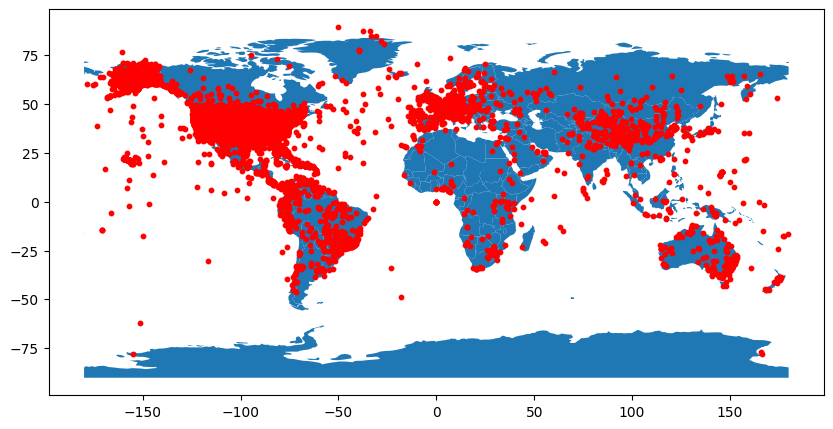

In [11]:
# Display the locations where accidents took place using geopandas

# Import the necessary libraries
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(aviation_df['Longitude'], aviation_df['Latitude'])]
gdf = GeoDataFrame(aviation_df, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=10);

In [12]:
# Group by latitude and longitude, count occurrences, and find the most frequent location
most_frequent_location = aviation_df.groupby(['Latitude', 'Longitude']).size().idxmax()

print("Most frequent location:")
print("Latitude:", most_frequent_location[0])
print("Longitude:", most_frequent_location[1])


Most frequent location:
Latitude: 33.460833
Longitude: -111.728334


In [13]:
from geopy.geocoders import Nominatim

def get_location_name(latitude, longitude):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.reverse((latitude, longitude), language='en')
    return location.address if location else "Location not found"


location_name = get_location_name(most_frequent_location[0], most_frequent_location[1])
print("Location where most of the accidnets took palce is:")
print(location_name)


Location where most of the accidnets took palce is:
Falcon Field, Service Road, Mesa, Maricopa County, Arizona, 85215, United States


In [14]:
# Drop the columns that has no corelationa nd has more nulll values
aviation_df = aviation_df.drop(["Latitude", "Longitude","Aircraft.Category","FAR.Description","Air.Carrier","Schedule"], axis=1)
# Convert Event Date into pandas date time format
aviation_df['EventDate'] = pd.to_datetime(aviation_df['Event.Date'])
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84262 entries, 0 to 84261
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                84262 non-null  object        
 1   Investigation.Type      84257 non-null  object        
 2   Accident.Number         84262 non-null  object        
 3   Event.Date              84262 non-null  object        
 4   Location                84185 non-null  object        
 5   Country                 83755 non-null  object        
 6   Airport.Code            47723 non-null  object        
 7   Airport.Name            50439 non-null  object        
 8   Injury.Severity         84262 non-null  object        
 9   Aircraft.Damage         81553 non-null  object        
 10  Registration.Number     80412 non-null  object        
 11  Make                    84192 non-null  object        
 12  Model                   84163 non-null  object

In [15]:
#Formatting the EventDate column into Date format
aviation_df['Year'] = aviation_df['EventDate'].dt.year
aviation_df['Month'] = aviation_df['EventDate'].dt.month_name().str[:3]
aviation_df['Day'] = aviation_df['EventDate'].dt.day_name().str[:3]
aviation_df = aviation_df[aviation_df['Year'] >= 1962]

In [16]:
#Top 5 largest Aircraft makes
aviation_df['Make'] = aviation_df['Make'].str.title()
aviation_df['Make'].value_counts().nlargest(5)


Cessna    26073
Piper     14230
Beech      5148
Bell       2598
Boeing     2349
Name: Make, dtype: int64

In [17]:
#Splitting the city and state location
aviation_df['City'] = aviation_df['Location'].str.split(',').str[0]
aviation_df['State'] = aviation_df['Location'].str.split(',').str[1]
aviation_df[['City', 'State']].head(5)


,City,State
0,Elk,CA
1,OLATHE,KS
2,Fairbanks,AK
3,GRANBURY,TX
4,Missoula,MT


# Data Cleaning

In [18]:
#Perform data cleaning on required columns
aviation_df['InjurySeverity'] = aviation_df['Injury.Severity'].str.split('(').str[0]
aviation_df['InjurySeverity'].value_counts()


Non-Fatal      63516
Fatal          16977
Incident        3443
Unavailable      325
Name: InjurySeverity, dtype: int64

In [19]:
aviation_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.Damage,...,Broad.Phase.of.Flight,Report.Status,Publication.Date,EventDate,Year,Month,Day,City,State,InjurySeverity
0,20200102X82407,Accident,WPR20CA055,12/31/2019,"Elk, CA",United States,LLR,Little River,Non-Fatal,Substantial,...,TAKEOFF,Factual,13/01/2020,2019-12-31,2019,Dec,Tue,Elk,CA,Non-Fatal
1,20191231X83852,Accident,CEN20FA049,12/31/2019,"OLATHE, KS",United States,OJC,Johnson County Executive,Fatal(2),Destroyed,...,TAKEOFF,Preliminary,8/1/2020,2019-12-31,2019,Dec,Tue,OLATHE,KS,Fatal
2,20200102X54844,Accident,ANC20CA011,12/31/2019,"Fairbanks, AK",United States,NaN,NaN,Non-Fatal,Substantial,...,NaN,Preliminary,2/1/2020,2019-12-31,2019,Dec,Tue,Fairbanks,AK,Non-Fatal
3,20191230X91852,Accident,CEN20CA048,12/30/2019,"GRANBURY, TX",United States,NaN,NaN,Non-Fatal,Substantial,...,NaN,Preliminary,31/12/2019,2019-12-30,2019,Dec,Mon,GRANBURY,TX,Non-Fatal
4,20191228X62945,NaN,WPR20CA053,12/28/2019,"Missoula, MT",United States,MSO,NaN,Unavailable,Substantial,...,NaN,Preliminary,3/1/2020,2019-12-28,2019,Dec,Sat,Missoula,MT,Unavailable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84256,20170710X52551,Accident,NYC79AA106,9/17/1979,"Boston, MA",United States,NaN,NaN,Non-Fatal,Substantial,...,CLIMB,Probable Cause,19/09/2017,1979-09-17,1979,Sep,Mon,Boston,MA,Non-Fatal
84257,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,APPROACH,Probable Cause,16/04/1980,1979-08-02,1979,Aug,Thu,Canton,OH,Fatal
84258,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,CRUISE,Probable Cause,12/9/2000,1977-06-19,1977,Jun,Sun,EUREKA,CA,Fatal
84259,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,CRUISE,Probable Cause,26/02/2007,1974-08-30,1974,Aug,Fri,Saltville,VA,Fatal


In [20]:
# Perform Data cleaning for Weather conditions
aviation_df['Weather.Condition'] = aviation_df['Weather.Condition'].fillna('Unknown')
aviation_df['Weather.Condition'].replace({'Unk':'Unknown'},inplace=True)
aviation_df['Weather.Condition'].replace({'UNK':'Unknown'},inplace=True)
print(aviation_df['Weather.Condition'].unique())


['VMC' 'Unknown' 'IMC']


In [21]:
aviation_df =aviation_df[aviation_df['Weather.Condition'].str.contains("Unknown")==False]
aviation_df['Weather.Condition'].value_counts()

VMC    74257
IMC     5840
Name: Weather.Condition, dtype: int64

In [22]:
# Perform Data cleaning for Aircraft Damage
print(aviation_df['Aircraft.Damage'].unique())

['Substantial' 'Destroyed' 'Minor' nan]


In [23]:
aviation_df['AircraftDamage'] = aviation_df['Aircraft.Damage'].fillna('Unknown')
df1 =aviation_df[aviation_df['AircraftDamage'].str.contains("Unknown")==False]
df1['AircraftDamage'].value_counts()

Substantial    59297
Destroyed      16740
Minor           2145
Name: AircraftDamage, dtype: int64

In [24]:
#Perform Data cleaning for  Phase of flight
print(aviation_df['Broad.Phase.of.Flight'].unique())

['TAKEOFF' 'APPROACH' nan 'LANDING' 'CRUISE' 'MANEUVERING' 'DESCENT'
 'CLIMB' 'TAXI' 'STANDING' 'UNKNOWN' 'GO-AROUND' 'OTHER']


In [25]:
aviation_df['BroadPhaseofFlight'] = df1['Broad.Phase.of.Flight'].fillna('Unknown')
aviation_df =aviation_df[aviation_df['BroadPhaseofFlight'].str.contains("Unknown")==False]
aviation_df['BroadPhaseofFlight'].value_counts()

LANDING        20011
TAKEOFF        15718
CRUISE         10356
MANEUVERING    10075
APPROACH        7847
TAXI            2304
CLIMB           2152
DESCENT         2051
GO-AROUND       1659
STANDING        1028
UNKNOWN          530
OTHER            140
Name: BroadPhaseofFlight, dtype: int64

In [26]:
# Perform Data cleaning for Number of Engines
print(aviation_df['Number.of.Engines'].unique())

[ 1.  2. nan  4.  0.  3.]


In [27]:
aviation_df = aviation_df.dropna(subset=['Number.of.Engines'])

In [28]:
# Perform Data cleaning for Engine Type
print(aviation_df['Engine.Type'].unique())

['Reciprocating' 'Turbo Prop' 'Turbo Shaft' 'Turbo Fan' 'Electric'
 'Turbo Jet' nan 'None' 'Unknown' 'REC, ELEC' 'Hybrid Rocket'
 'REC, TJ, TJ' 'TJ, REC, REC, TJ']


In [29]:
aviation_df['Engine.Type'] = aviation_df['Engine.Type'].fillna('Unknown')
aviation_df =aviation_df[aviation_df['Engine.Type'].str.contains("Unknown")==False]
aviation_df['Engine.Type'].value_counts()


Reciprocating       63929
Turbo Shaft          3050
Turbo Prop           2780
Turbo Fan            1283
Turbo Jet             490
None                    9
Electric                6
REC, TJ, TJ             2
REC, ELEC               1
Hybrid Rocket           1
TJ, REC, REC, TJ        1
Name: Engine.Type, dtype: int64

In [30]:
# Perform Data cleaning for Make
print(aviation_df['Make'].unique())

['Cessna' 'Mooney' 'Piper' ... 'Mcdonnell-Douglas' 'Bell/Textron'
 'Sons Mustang']


In [31]:
aviation_df['Make'] = aviation_df['Make'].fillna('Unknown')
aviation_df =aviation_df[aviation_df['Make'].str.contains("Unknown")==False]
aviation_df['Make'].value_counts().head(10)

Cessna      23916
Piper       13008
Beech        4579
Bell         2114
Mooney       1173
Grumman      1096
Bellanca      973
Boeing        871
Robinson      831
Hughes        789
Name: Make, dtype: int64

In [32]:
aviation_df = aviation_df.dropna(subset=['Amateur.Built'])
aviation_df['Amateur.Built'].replace({'Y':'Yes'},inplace=True)
aviation_df['Amateur.Built'].replace({'N':'No'},inplace=True)
print(aviation_df['Amateur.Built'].unique())

['No' 'Yes']


In [33]:
aviation_df['Amateur.Built'].value_counts()

No     64299
Yes     7174
Name: Amateur.Built, dtype: int64

In [34]:
# Perform Data cleaning for Purpose of Flight
print(aviation_df['Purpose.of.Flight'].unique())

['Personal' 'Executive/Corporate' nan 'Instructional' 'Business'
 'Banner Tow' 'Other Work Use' 'Flight Test' 'Air Race/Show'
 'Aerial Application' 'Ferry' 'Positioning' 'Public Aircraft - Local'
 'Aerial Observation' 'Skydiving' 'External Load'
 'Public Aircraft - Federal' 'Unknown' 'Air Drop'
 'Public Aircraft - State' 'Glider Tow' 'Public Aircraft' 'Firefighting']


In [35]:
aviation_df = aviation_df.dropna(subset=['Purpose.of.Flight'])
aviation_df['Purpose.of.Flight'].value_counts()

Personal                     42345
Instructional                 9273
Unknown                       4960
Aerial Application            4300
Business                      3556
Positioning                   1378
Other Work Use                 983
Ferry                          711
Aerial Observation             598
Public Aircraft                515
Executive/Corporate            449
Flight Test                    302
Skydiving                      146
Air Race/Show                   85
Banner Tow                      76
Public Aircraft - Federal       74
External Load                   70
Public Aircraft - Local         53
Public Aircraft - State         49
Glider Tow                      32
Firefighting                    15
Air Drop                         9
Name: Purpose.of.Flight, dtype: int64

In [36]:
# Perform Data cleaning for Location/Country
aviation_df = aviation_df.dropna(subset=['Country'])
top_5 = aviation_df["Country"].value_counts().head()
top_5

United States               69474
Bahamas                        14
Brazil                          8
Northern Mariana Islands        7
Canada                          7
Name: Country, dtype: int64

In [37]:
# Perform Data cleaning for Investigation Type
aviation_df=aviation_df[aviation_df["Investigation.Type"].astype('str').str.contains("Incident")==False]
aviation_df['Investigation.Type'].value_counts()

Accident    68453
Name: Investigation.Type, dtype: int64

In [38]:
filtered_df = aviation_df[aviation_df['Year'] == 2023]
filtered_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.Damage,...,Publication.Date,EventDate,Year,Month,Day,City,State,InjurySeverity,AircraftDamage,BroadPhaseofFlight


<Axes: xlabel='Year'>

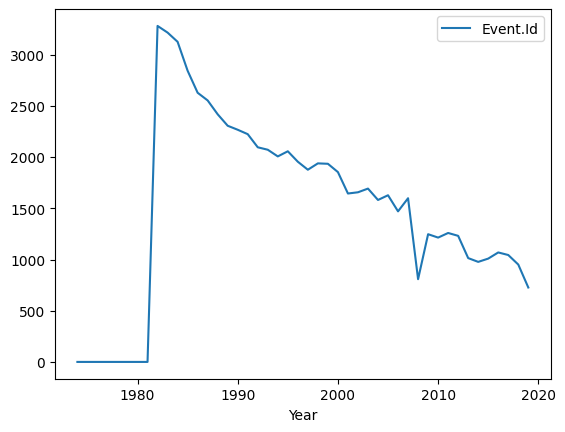

In [39]:
#Plotting the trend for accidents vs Year
year_wise_accidents = aviation_df.groupby(['Year'], as_index = False)['Event.Id'].count()
year_wise_accidents.plot(x = 'Year', y = 'Event.Id')

<Axes: xlabel='Year'>

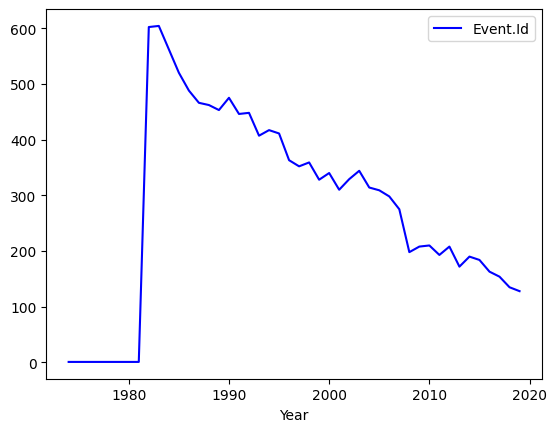

In [40]:
#Plotting the trend for Fatality vs Year
Fatal_injuries = aviation_df[aviation_df['InjurySeverity'] =='Fatal'].groupby(['Year'], as_index = False)['Event.Id'].count()
Fatal_injuries.plot(x = 'Year', y = 'Event.Id', color = 'blue' )

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Accidents per month')]

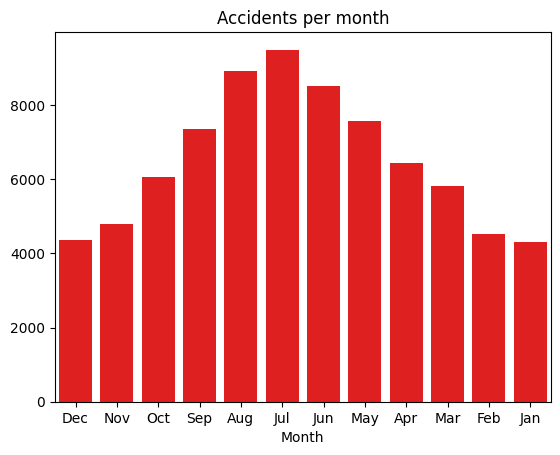

In [41]:
#Plotting the trend Accidents per Month
plot = sns.countplot(x = 'Month', color = 'r', data = df1)
plot.set(xlabel = 'Month', ylabel = None, title = 'Accidents per month')


[Text(0.5, 0, 'Day'), Text(0, 0.5, ''), Text(0.5, 1.0, 'Accidents Day wise')]

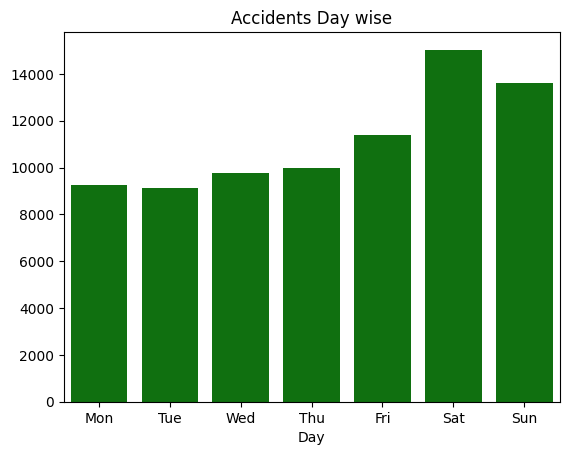

In [42]:
#Plotting the trend showing number of Accidents per day-wise
plot = sns.countplot(x = 'Day', order = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], color = 'g', data = df1)
plot.set(xlabel = 'Day', ylabel = None, title = 'Accidents Day wise')
#[Text(0.5, 0, 'Day'), Text(0, 0.5, ''), Text(0.5, 1.0, 'Accidents Day wise')]

[Text(0, 0, 'LANDING'),
 Text(1, 0, 'TAKEOFF'),
 Text(2, 0, 'CRUISE'),
 Text(3, 0, 'MANEUVERING'),
 Text(4, 0, 'APPROACH'),
 Text(5, 0, 'TAXI'),
 Text(6, 0, 'CLIMB'),
 Text(7, 0, 'DESCENT'),
 Text(8, 0, 'GO-AROUND'),
 Text(9, 0, 'STANDING'),
 Text(10, 0, 'UNKNOWN'),
 Text(11, 0, 'OTHER')]

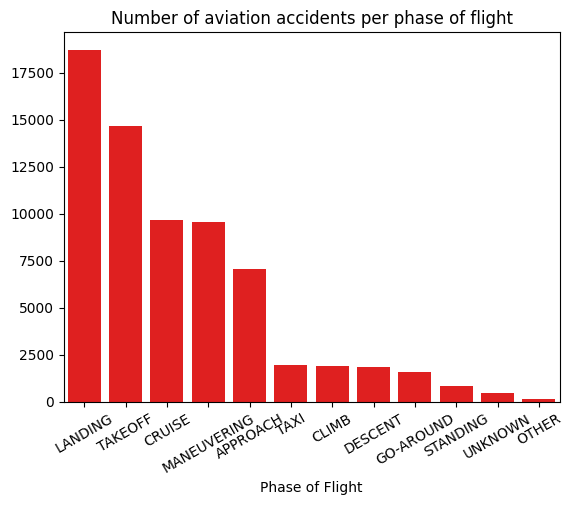

In [43]:
#Plotting number of aviation accidents per phase of flight
Phase_of_flight = aviation_df[(aviation_df['BroadPhaseofFlight'] != 'Unknown') &(aviation_df['BroadPhaseofFlight'] != 'Other')]
plot = sns.countplot(x = 'BroadPhaseofFlight', order = Phase_of_flight['BroadPhaseofFlight'].value_counts().index, color ='r', data = Phase_of_flight)
plot.set(xlabel = 'Phase of Flight', ylabel = None, title = 'Number of aviation accidents per phase of flight')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)

In [44]:
aviation_df['Survival_rate'] =((aviation_df['Total.Serious.Injuries'] +
                                aviation_df['Total.Minor.Injuries'] +
                                aviation_df["Total.Uninjured"]))/ (aviation_df['Total.Fatal.Injuries'] +
                                 aviation_df['Total.Serious.Injuries'] +
                                 aviation_df['Total.Minor.Injuries'] +
                                 aviation_df["Total.Uninjured"])
aviation_df['Survival_rate'].dropna()

18548    1.0
18617    1.0
18678    1.0
18700    1.0
18732    1.0
        ... 
84252    1.0
84253    1.0
84254    1.0
84255    0.0
84258    0.0
Name: Survival_rate, Length: 44517, dtype: float64

In [46]:
weather_metric
#In aviation, instrument meteorological conditions (IMC)
#are weather conditions that require pilots to fly primarily by reference to flight instruments,

#In aviation, visual meteorological conditions (VMC) is an aviation flight category in which visual flight rules (VFR) flight is permitted—that is,
#conditions in which pilots have sufficient visibility to fly the aircraft maintaining visual separation from terrain and other aircraft.

,Weather.Condition,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Survival_rate
0,IMC,6262.0,6915.0,1378.0,1671.0,8100.0,9515381,1568.296187
1,VMC,69756.0,18762.0,11429.0,19090.0,94968.0,127155193,35265.432056


<Axes: >

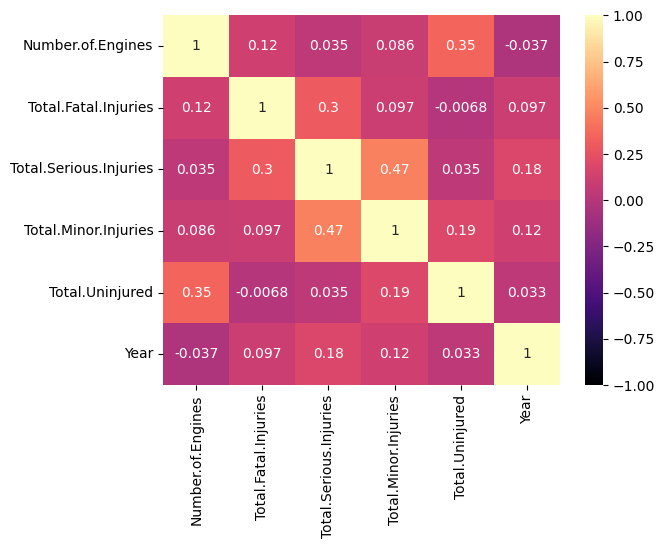

In [47]:
#Plotting heatmap to find correlation
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot= True, cmap="magma" )

<Axes: xlabel='AircraftDamage', ylabel='Total.Fatal.Injuries'>

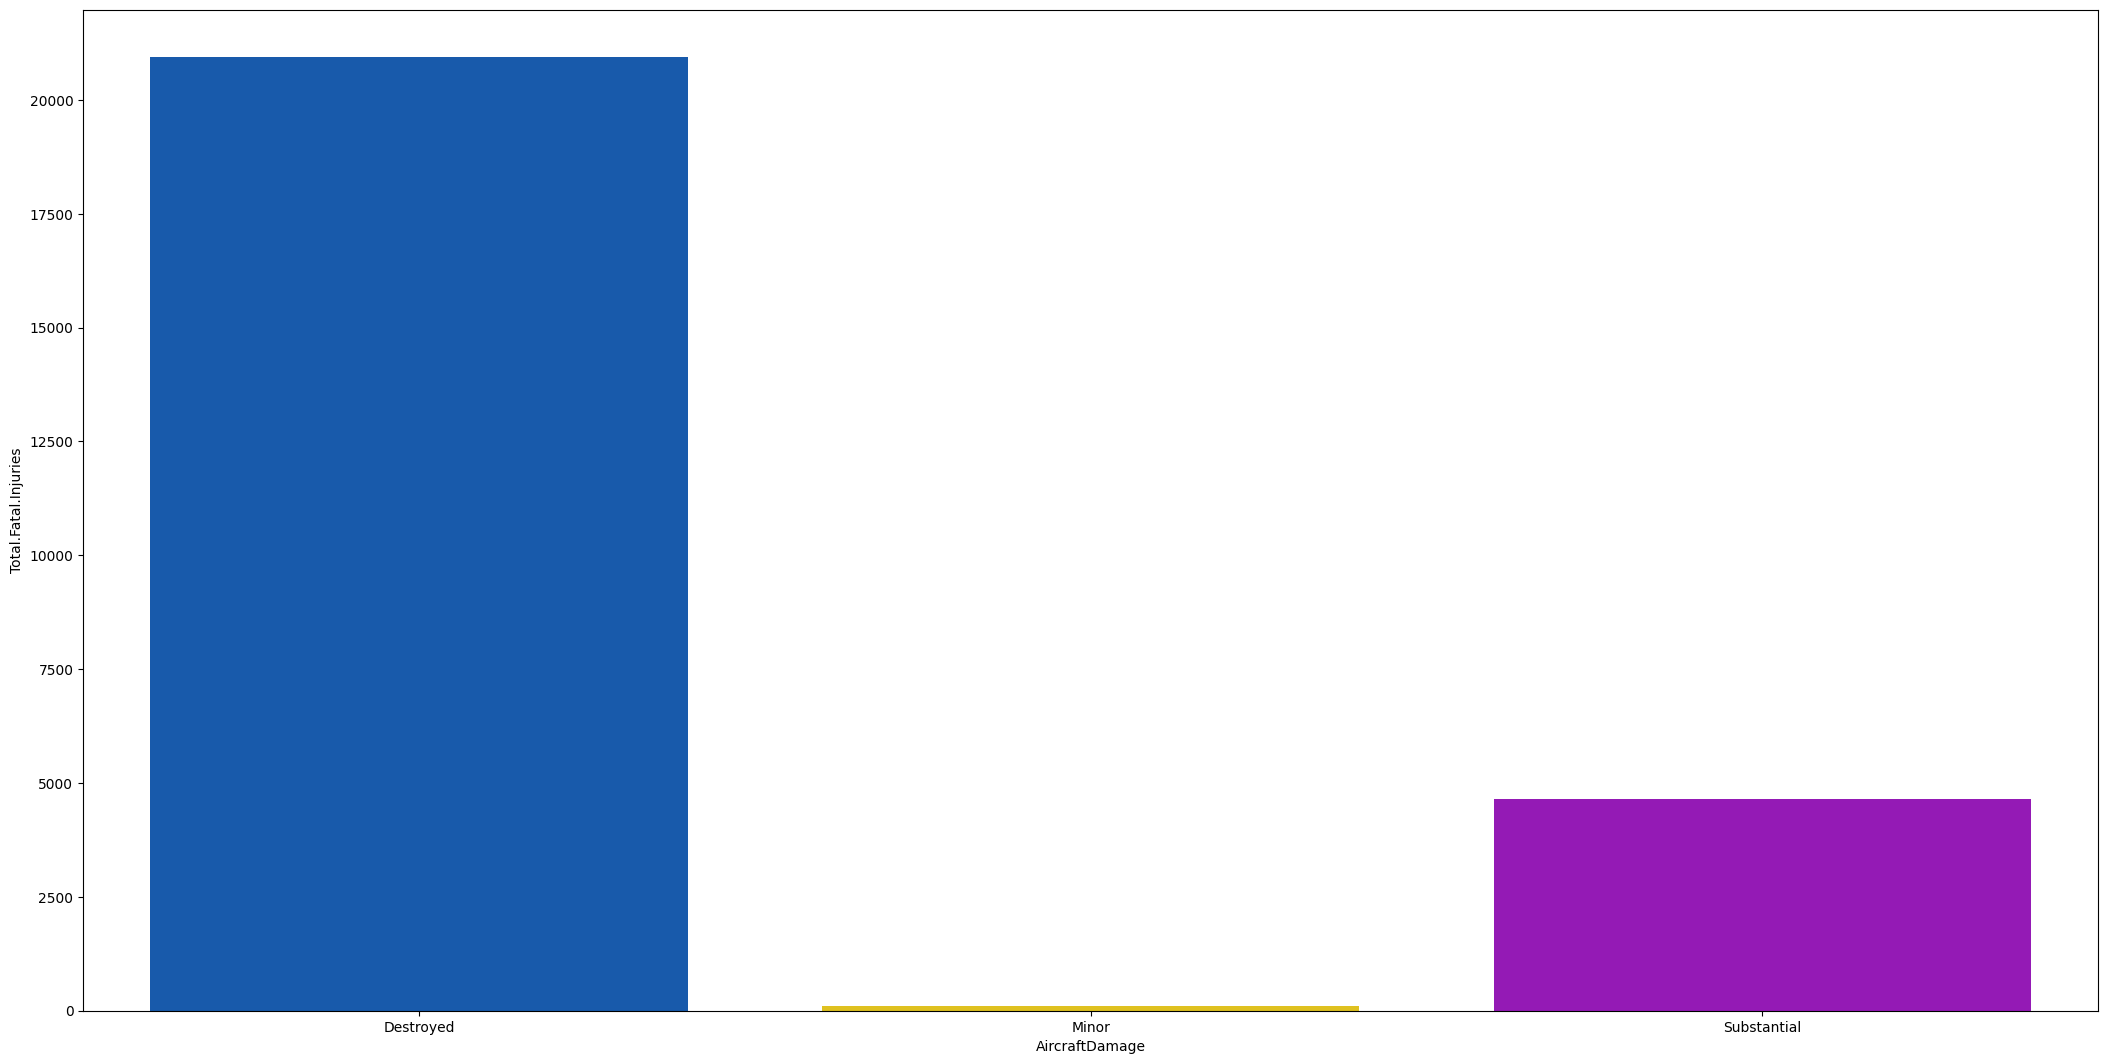

In [48]:
#Plotting the trend for Aircraft Damage vs Total Fatal Injuries
damage = aviation_df.groupby("AircraftDamage").sum().reset_index()
figr, axes=plt.subplots(figsize= (26,13))
sns.barplot(x = 'AircraftDamage',y='Total.Fatal.Injuries' , data =
damage.reset_index() , palette = 'prism')


<Axes: xlabel='AircraftDamage', ylabel='Total.Uninjured'>

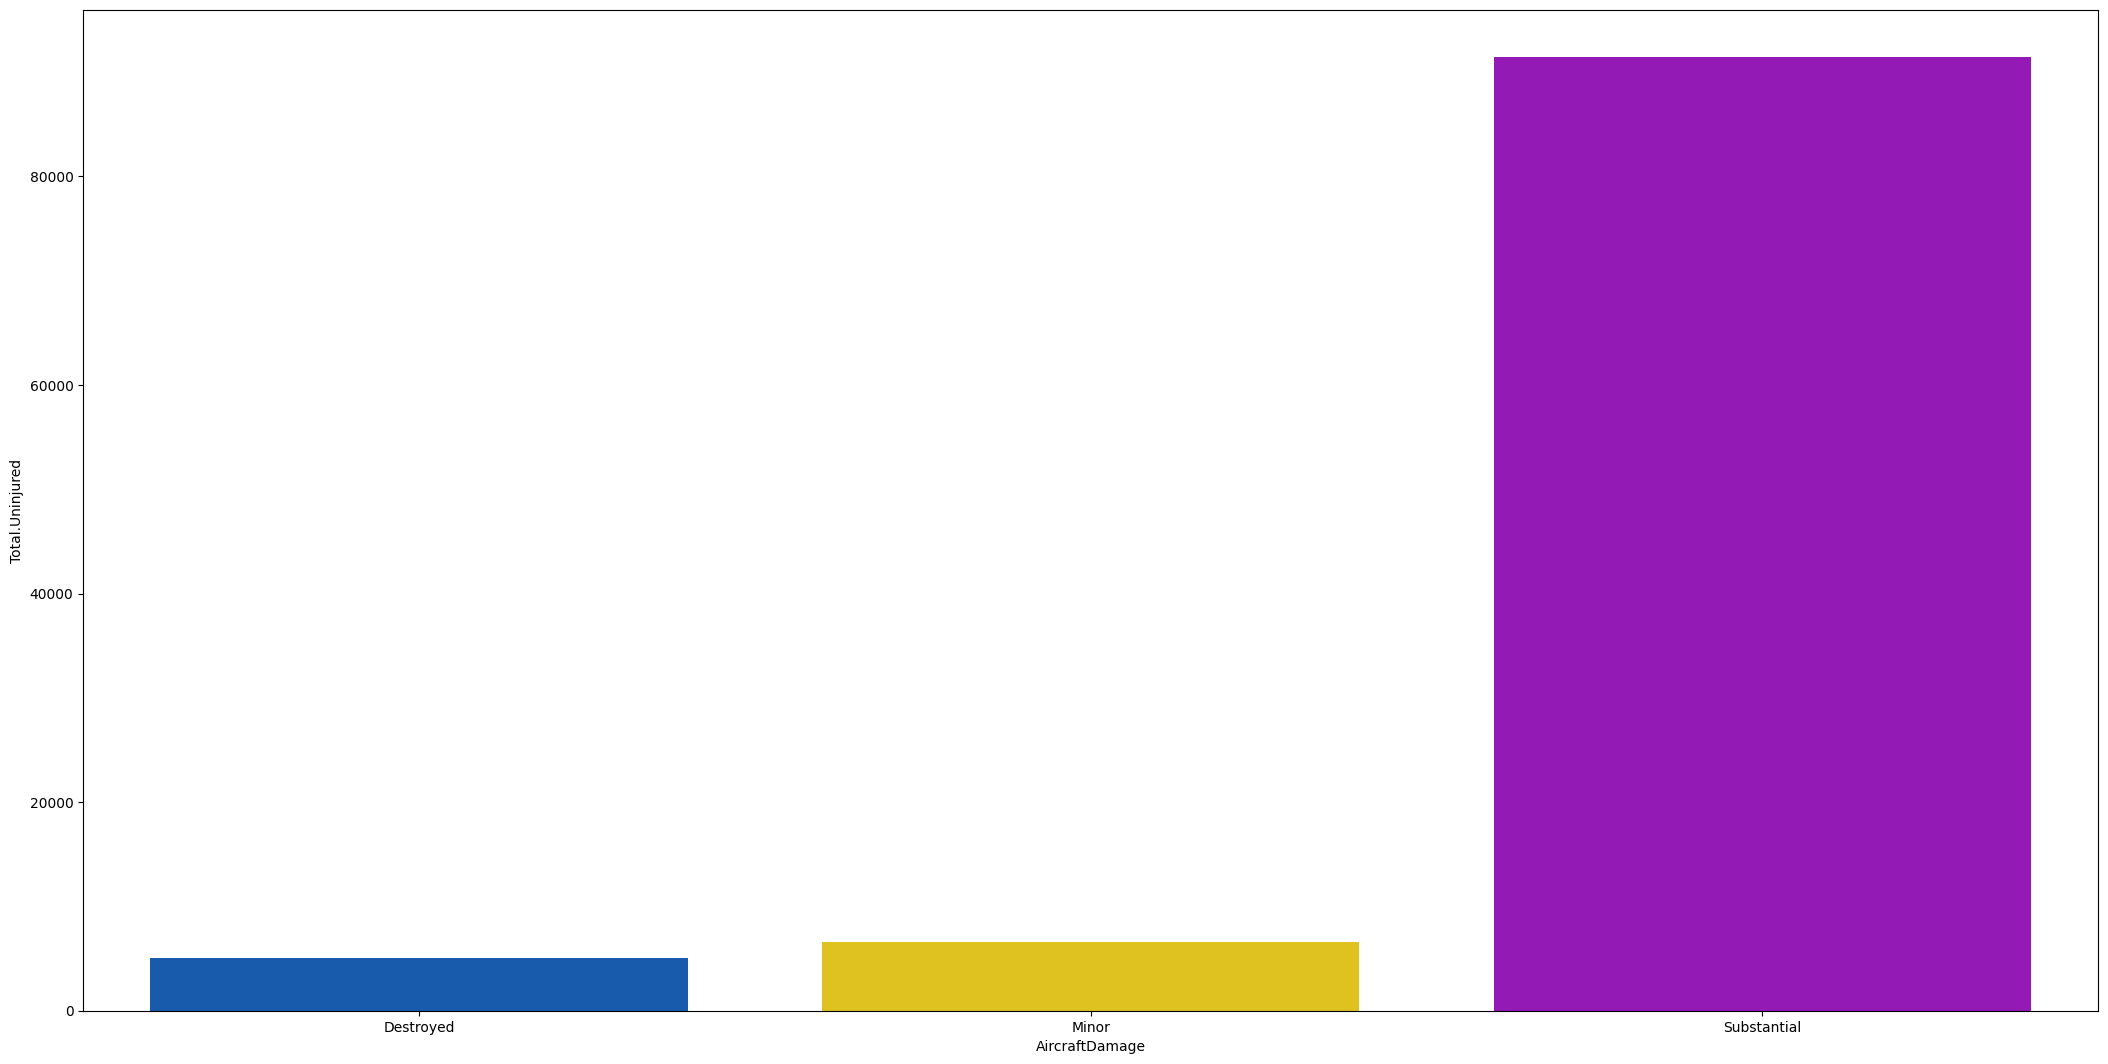

In [49]:
#Plotting the trend for Aircraft Damage and Total Uninjured
damage= aviation_df.groupby("AircraftDamage").sum().reset_index()
figr, axes=plt.subplots(figsize= (26,13))
sns.barplot(x = 'AircraftDamage',y='Total.Uninjured' , data =
damage.reset_index() , palette = 'prism')


<Axes: xlabel='BroadPhaseofFlight', ylabel='Total.Fatal.Injuries'>

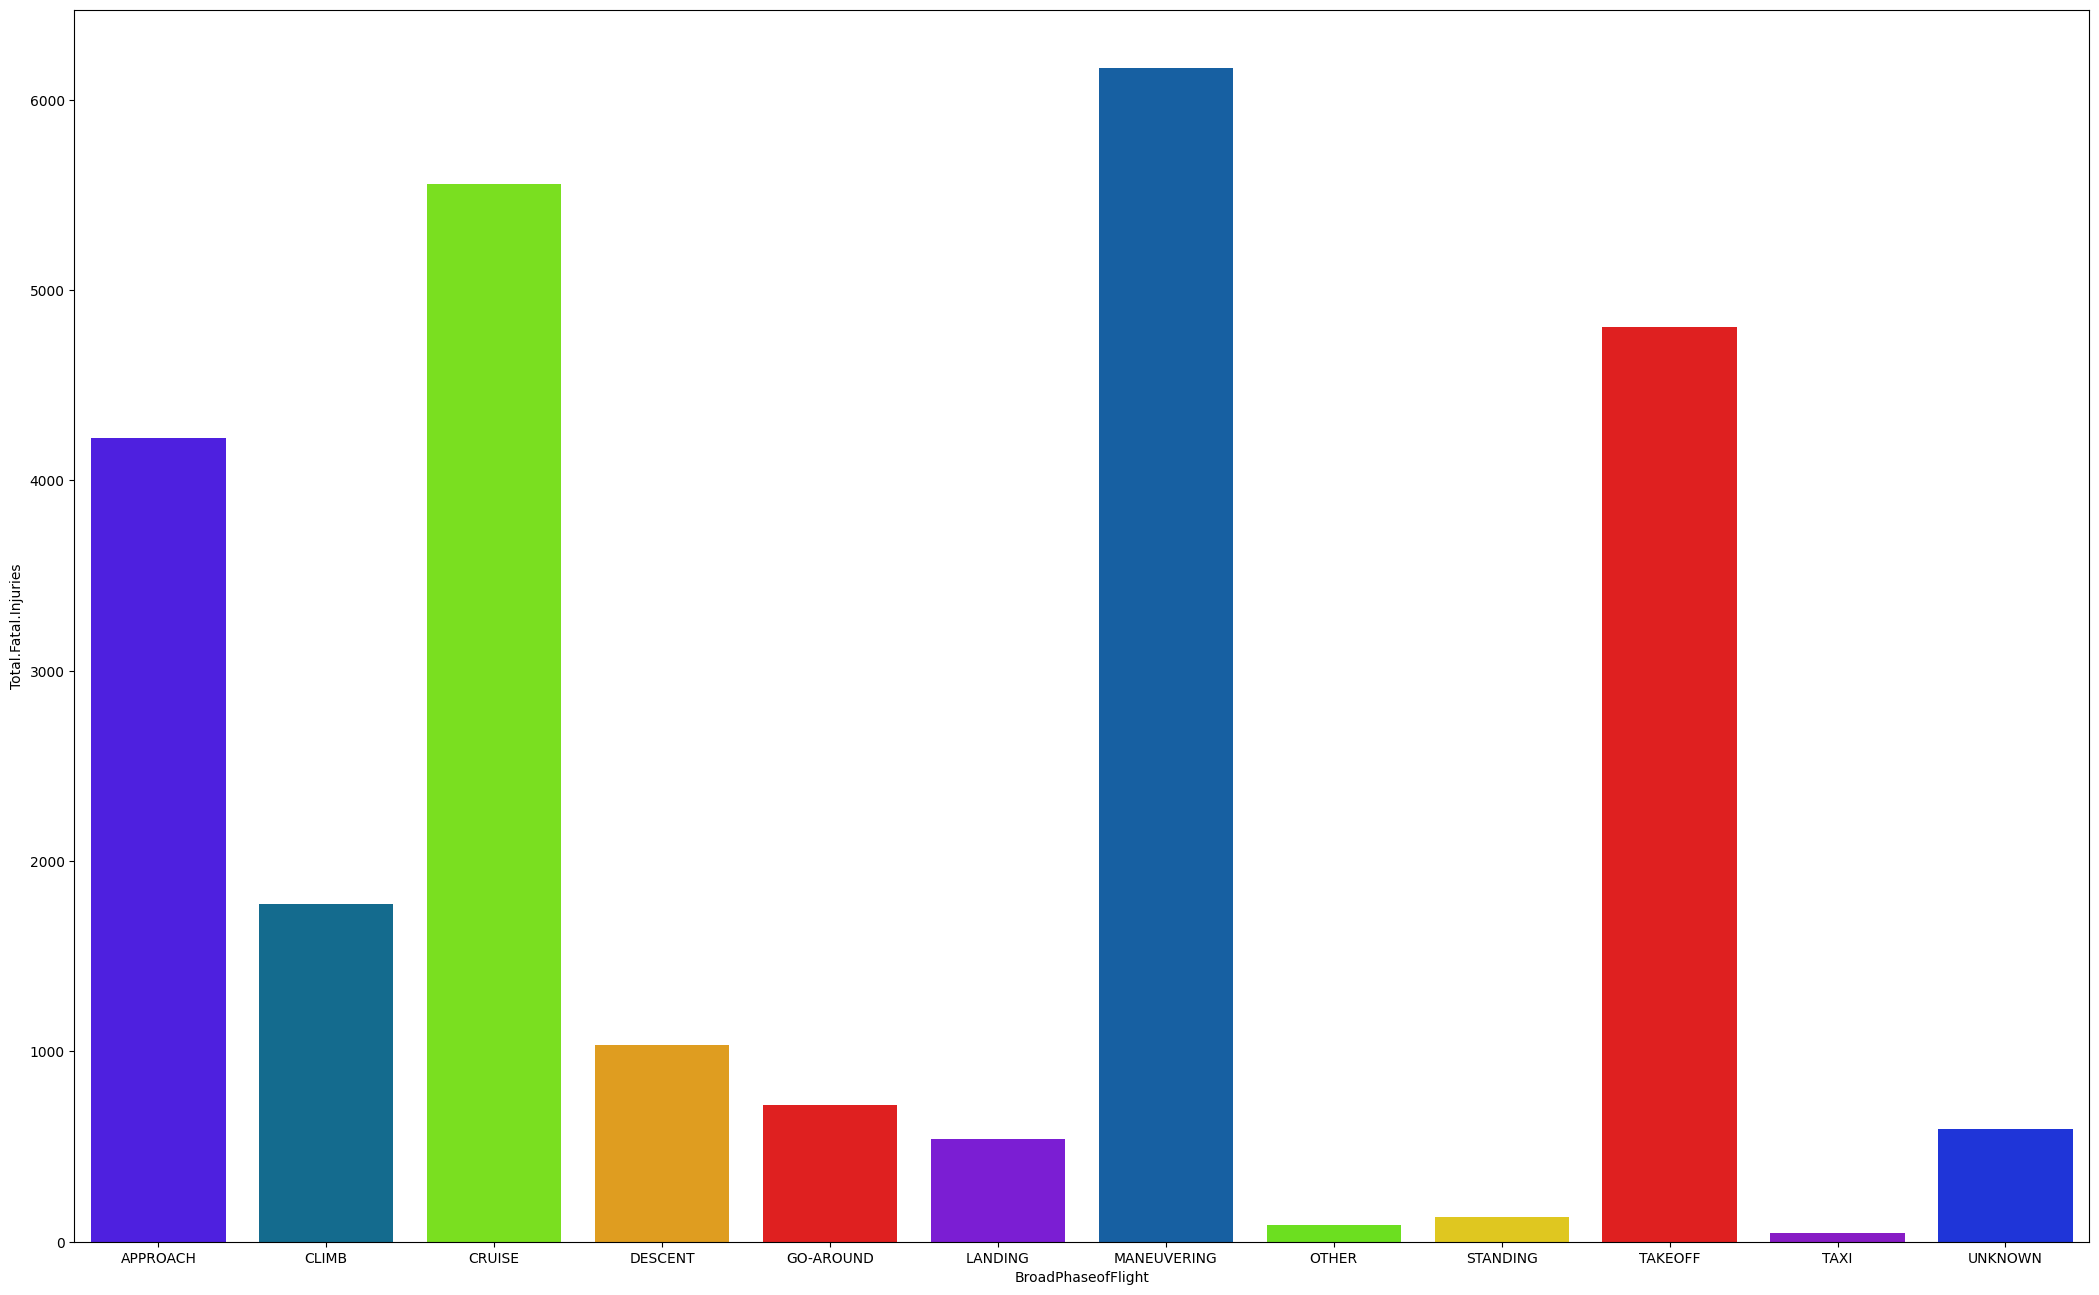

In [50]:
#Plotting the trend for phase of flight and Total Fatal Injuries
phase = aviation_df.groupby("BroadPhaseofFlight").sum().reset_index()
figr, axes=plt.subplots(figsize= (26,16))
sns.barplot(x = 'BroadPhaseofFlight',y='Total.Fatal.Injuries' ,
data = phase.reset_index() , palette = 'prism')

<Axes: xlabel='Engine.Type', ylabel='Total.Fatal.Injuries'>

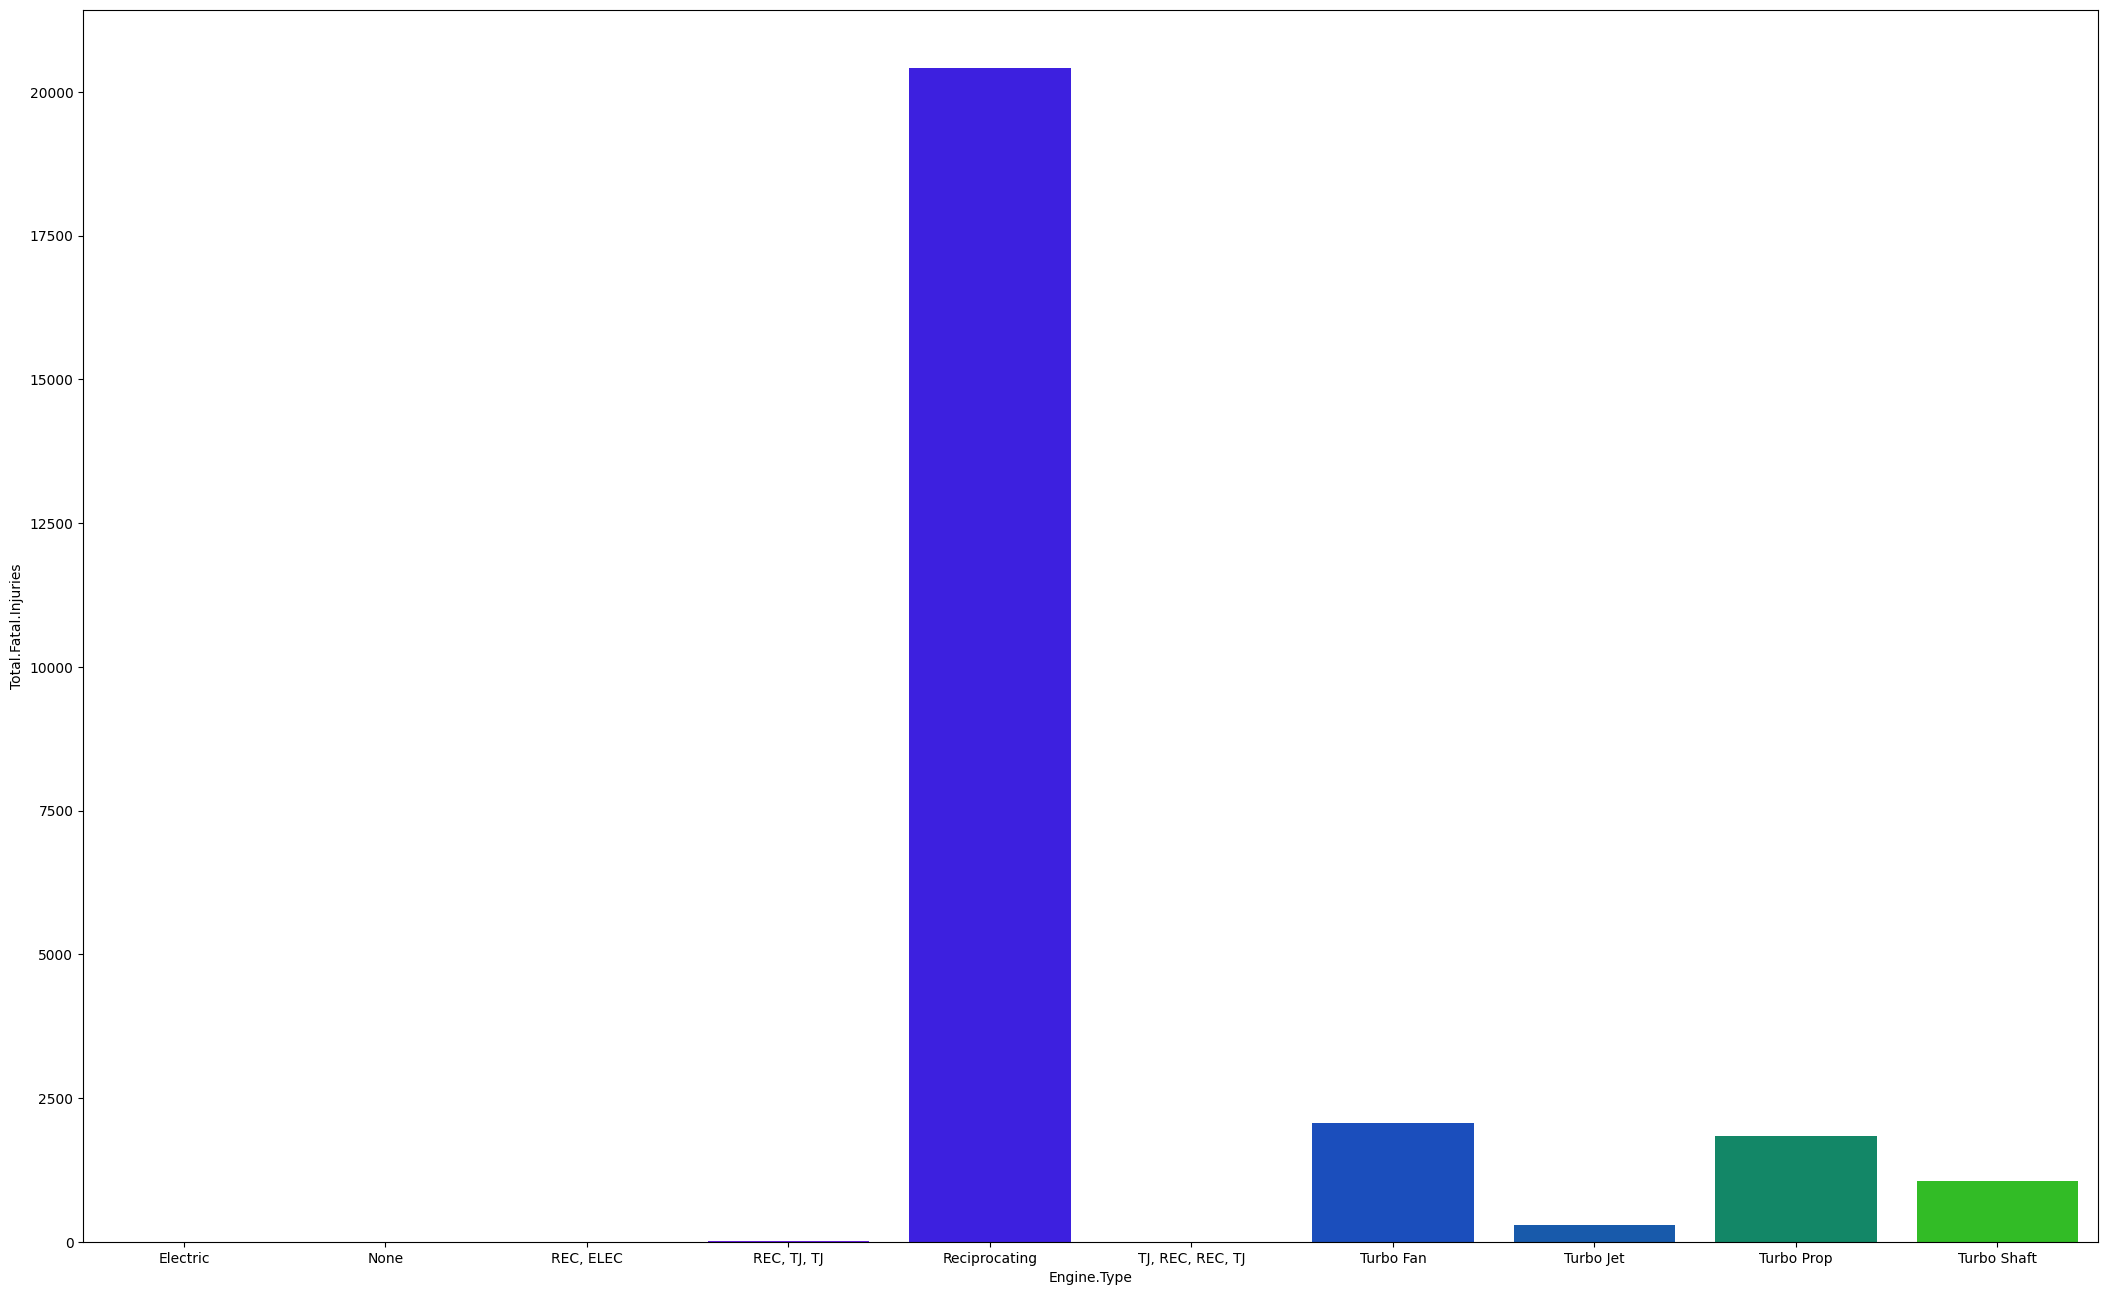

In [51]:
#Plotting the trend for Engine Type vs Total Fatal Injuries
Engine = aviation_df.groupby("Engine.Type").sum().reset_index()
figr, axes=plt.subplots(figsize= (26,16))
sns.barplot(x = 'Engine.Type',y='Total.Fatal.Injuries' , data =
Engine.reset_index() , palette = 'prism')


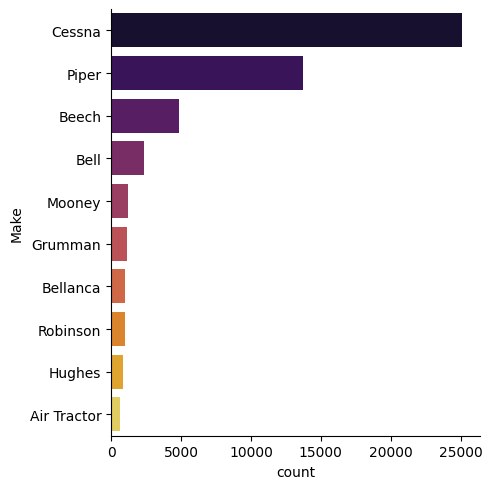

In [52]:
#Plotting on Make
sns.catplot(y ='Make', data=df1 , kind= "count", palette="inferno",
order = aviation_df["Make"].value_counts().head(10).index, height = 5)

<Axes: xlabel='Number.of.Engines', ylabel='Total.Fatal.Injuries'>

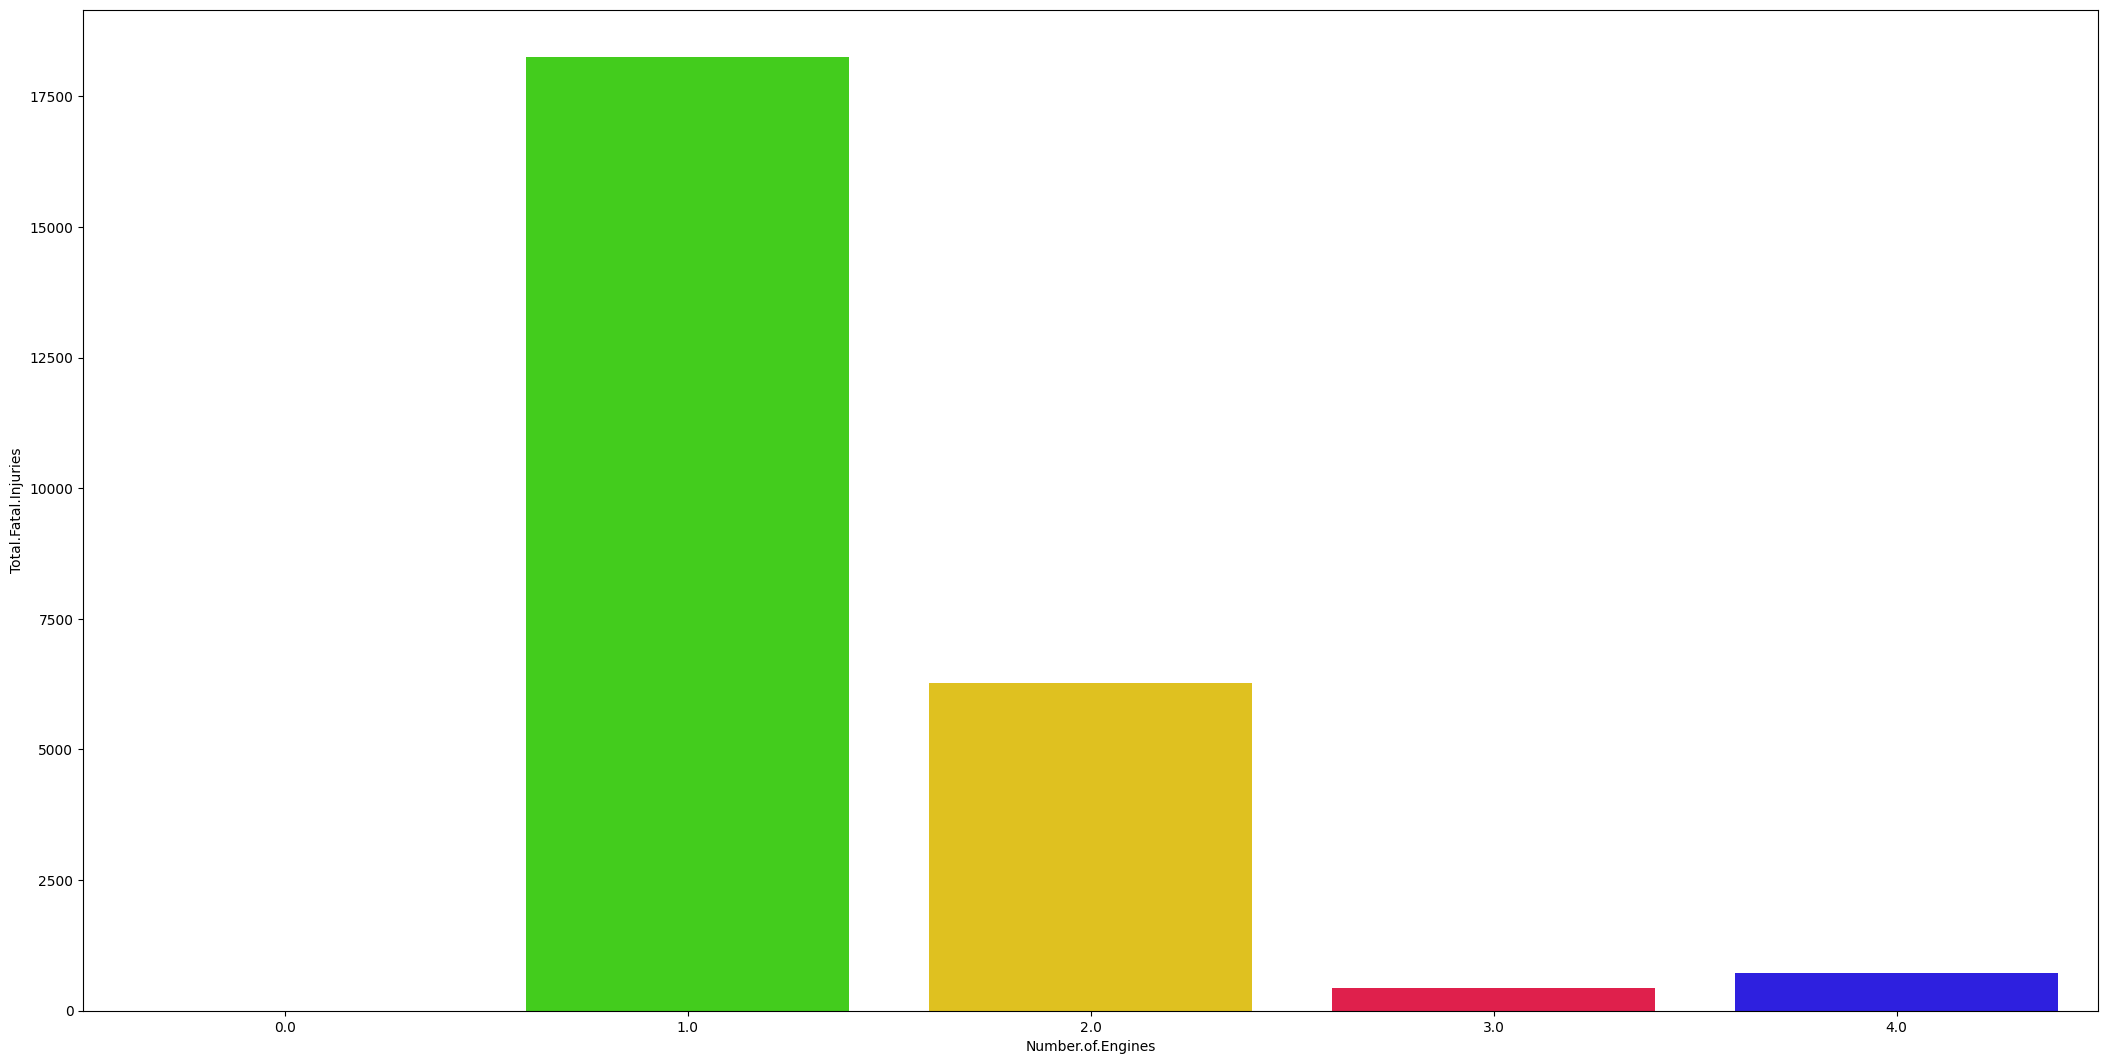

In [53]:
#Plotting the trend for Number of Engines vs Total Fatal Injuries
engines= aviation_df.groupby("Number.of.Engines").sum().reset_index()
figr, axes=plt.subplots(figsize= (26,13))
sns.barplot(x = 'Number.of.Engines',y='Total.Fatal.Injuries' , data = engines.reset_index() , palette = 'prism')

<Axes: xlabel='Amateur.Built', ylabel='Total.Fatal.Injuries'>

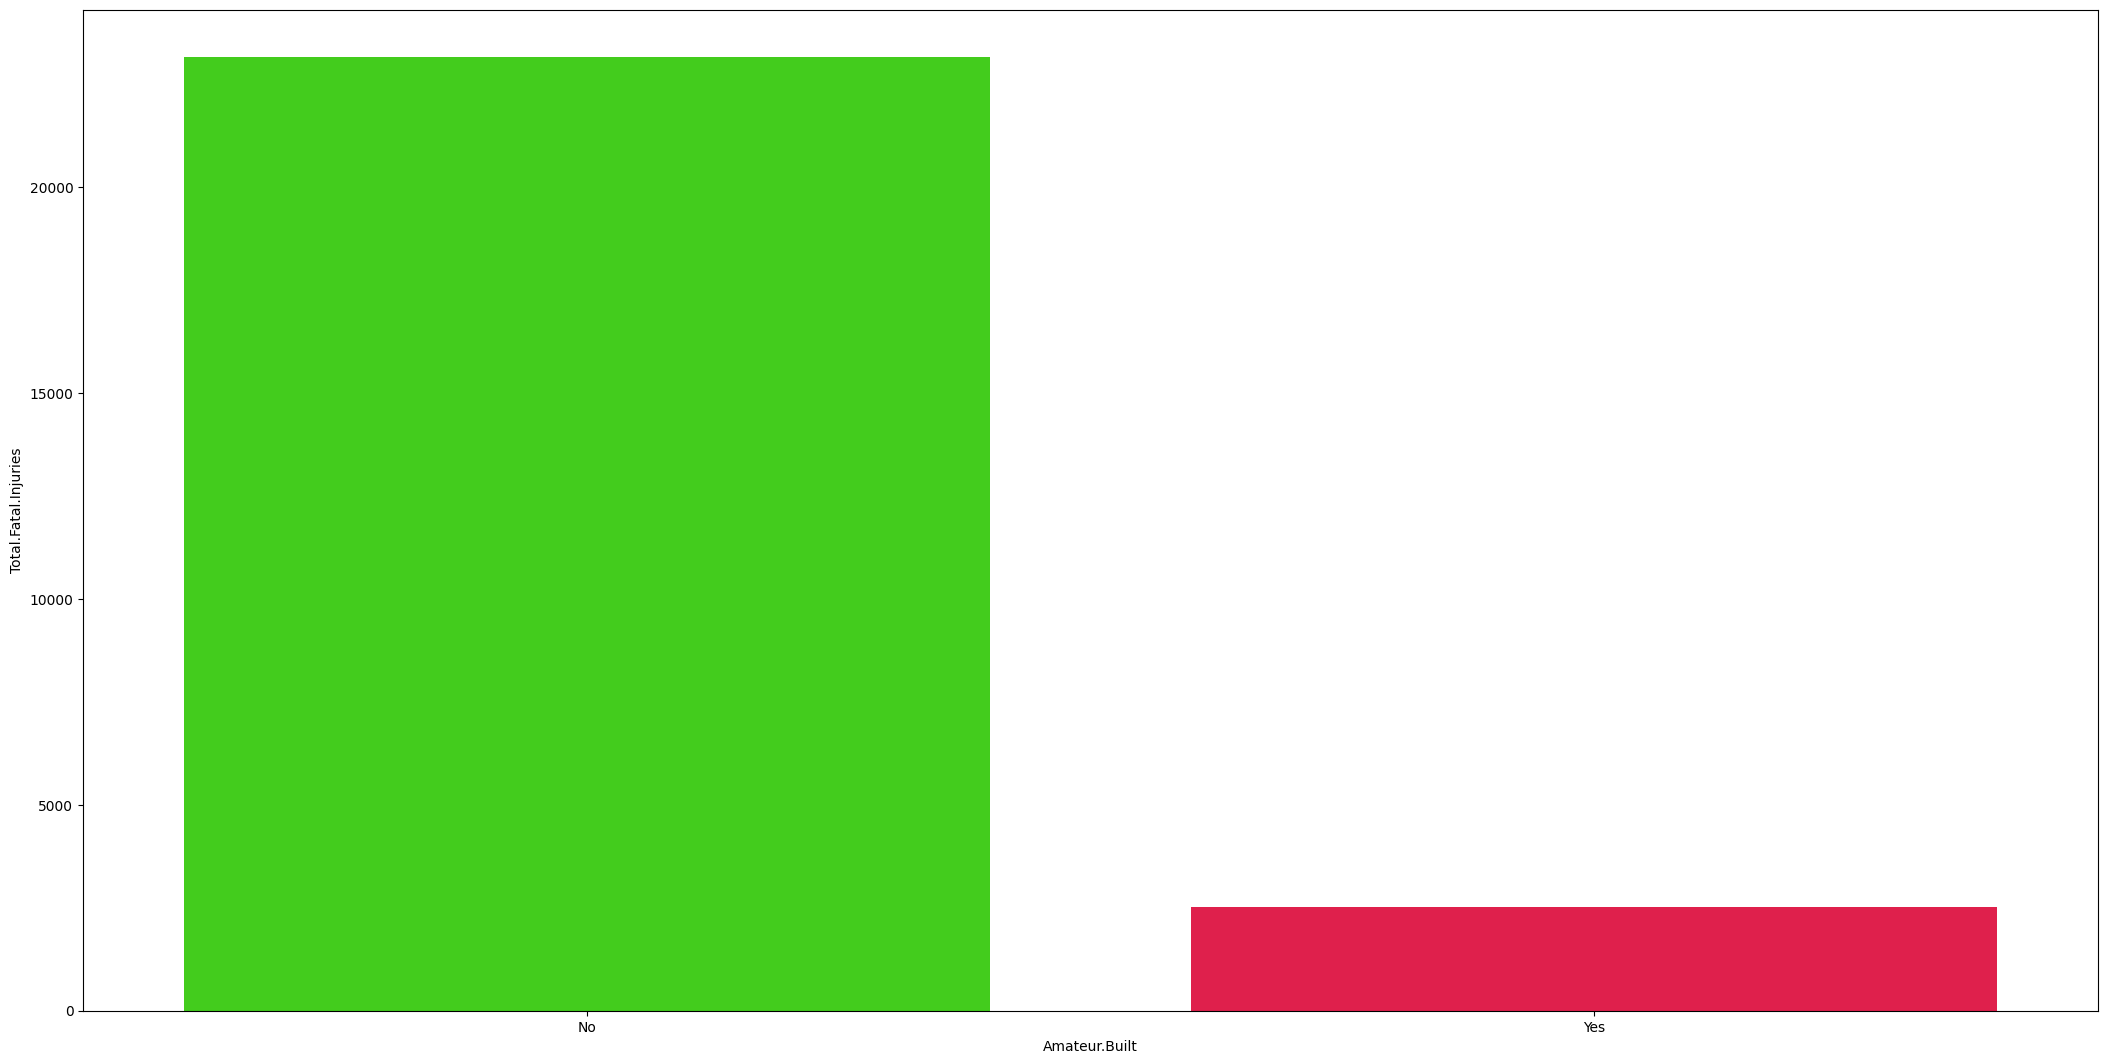

In [54]:
#Plotting the trend for AmateurBuilt vs Total Fatal Injuries
Amateur_built= aviation_df.groupby("Amateur.Built").sum().reset_index()
figr, axes=plt.subplots(figsize= (26,13))
sns.barplot(x = 'Amateur.Built',y='Total.Fatal.Injuries' , data = Amateur_built.reset_index() , palette = 'prism')

In [55]:
aviation_df['Total.Fatal.Injuries'].fillna(0,inplace=True)
aviation_df['Total.Minor.Injuries'].fillna(0,inplace=True)
aviation_df['Total.Uninjured'].fillna(0,inplace=True)
aviation_df['Total.Serious.Injuries'].fillna(0,inplace=True)

#Preparing the Data
#Taking the columns which are most relevant for prediction

In [56]:
new_aviation_df = aviation_df[[ "Weather.Condition", "InjurySeverity",
"AircraftDamage", "Engine.Type", "Number.of.Engines","Location"]].copy()
new_aviation_df['Engine.Type'].unique()
mapping = {'Reciprocating':0, 'Turbo Prop':1, 'Electric':2, 'Turbo Shaft':3,
        'Turbo Jet':4, 'Turbo Fan':5, 'None':7, 'REC, ELEC':6, 'REC, TJ, TJ':8,
       'TJ, REC, REC, TJ':9}
new_aviation_df['Engine.Type'] = aviation_df['Engine.Type'].map(mapping)
new_aviation_df['InjurySeverity'].unique()

array(['Non-Fatal', 'Fatal', 'Unavailable'], dtype=object)

In [57]:
new_aviation_df['Weather.Condition'].replace({'IMC': 0, 'VMC': 1},inplace =True)
new_aviation_df['InjurySeverity'].replace({'Fatal': 0, 'Non-Fatal': 1,'Unavailable':3},inplace= True)
#new_df1['InjurySeverity'].astype(int, errors='ignore')
new_aviation_df['AircraftDamage'].replace({'Minor': 0, 'Destroyed': 1,'Substantial' : 2},inplace = True)
new_aviation_df['Number.of.Engines'] = new_aviation_df['Number.of.Engines'].astype('int')
new_aviation_df.dtypes



Weather.Condition     int64
InjurySeverity        int64
AircraftDamage        int64
Engine.Type           int64
Number.of.Engines     int64
Location             object
dtype: object

In [58]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split


In [59]:
location_df = pd.get_dummies(new_aviation_df[['Location']], drop_first=True)
location_df

,"Location_0WASSO, OK","Location_1 1/2 MI.N. MAY, KS","Location_1/4NM S. OF PEO, OR","Location_10 EAST OF TILL, OR","Location_10 M.N. OF GILR, CA","Location_10 NM E. OF KEN, ID","Location_10 NM W LEE VIN, CA","Location_10 SW FALLS CIT, NE","Location_10 SW OF MILAN, MO","Location_10 WEST OF BIGG, CA",...,"Location_Zellwood, FL","Location_Zephryhills, FL","Location_Zephyrhills, FL","Location_Zepp, VA","Location_Zillah, WA","Location_Zionsville, IN","Location_Zuni, NM","Location_Zurich, MT","Location_Zwingle, IA","Location_helena, MT"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Label encode the target variable 'Location'
from sklearn.preprocessing import LabelEncoder

y = new_aviation_df['Location']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [61]:
X = new_aviation_df[["Weather.Condition", "AircraftDamage","Number.of.Engines", "Engine.Type"]] #Feature columns
y = new_aviation_df["InjurySeverity"] #target column
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(4,'Score'))

               Specs        Score
1     AircraftDamage  2550.562232
0  Weather.Condition   420.259760
3        Engine.Type   154.975559
2  Number.of.Engines    61.278950


# **Deployment of Machine Learning Models**

# **Random** **Forest**

In [62]:
#Random Forest

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracies = {}
y = new_aviation_df["InjurySeverity"]
X = new_aviation_df[["Weather.Condition", "AircraftDamage","Number.of.Engines"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model_rfc = RandomForestClassifier(n_estimators=350)
model_rfc.fit(X_train,y_train)
y_pred = model_rfc.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy of the model:{:.2f}'.format(model_rfc.score(X_test,y_test)))
accuracies['Random Forest']= accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.66      0.76      0.70      2644
           1       0.94      0.90      0.92     11044
           3       0.00      0.00      0.00         3

    accuracy                           0.88     13691
   macro avg       0.53      0.55      0.54     13691
weighted avg       0.88      0.88      0.88     13691

Accuracy of the model:0.88


In [63]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_mat_rf = confusion_matrix(y_test,y_pred)
print("Confusion Matric for Random Forest\n")
print(conf_mat_rf)

Confusion Matric for Random Forest

[[2005  639    0]
 [1050 9994    0]
 [   0    3    0]]


Text(0.5, 23.52222222222222, 'Predicted label')

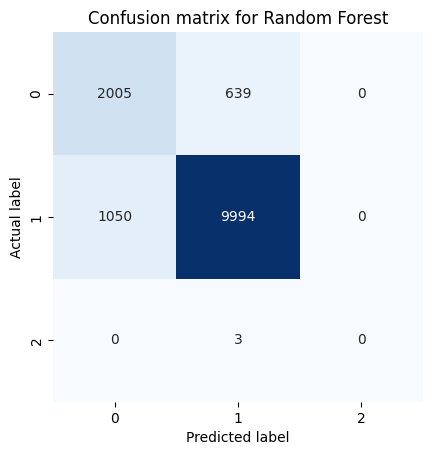

In [64]:
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues',
fmt='d', cbar=False)
plt.title('Confusion matrix for Random Forest', y=1.0)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
#Logistic Regression

y = new_aviation_df["InjurySeverity"]
X = new_aviation_df[["Weather.Condition", "AircraftDamage", "Number.of.Engines"]]

from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
#LogisticRegression()
y_pred = model_lr.predict(X_test)
print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test,y_pred))
accuracies['Logistc Regression']= accuracy_score(y_test, y_pred)

Accuracy of Logistic Regression model is: 86.99875830837776
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      2537
           1       0.94      0.90      0.92     11150
           3       0.00      0.00      0.00         4

    accuracy                           0.87     13691
   macro avg       0.52      0.55      0.53     13691
weighted avg       0.88      0.87      0.87     13691



Text(0.5, 23.52222222222222, 'Predicted label')

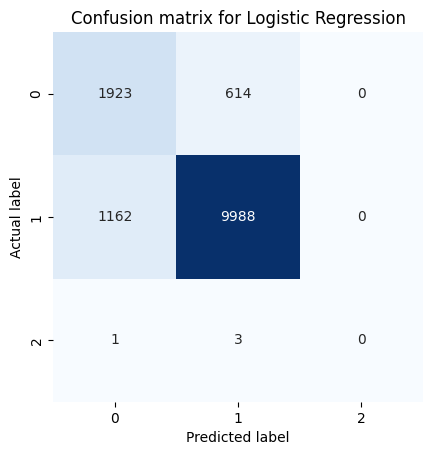

In [66]:
from sklearn import metrics
from array import array

metrics.confusion_matrix(y_test, y_pred)
#array([[1690, 344],[1084, 8019]], dtype='int64')
matrix_confusion = confusion_matrix(y_test, y_pred)
matrix_confusion
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues',
fmt='d', cbar=False)
plt.title('Confusion matrix for Logistic Regression', y=1.0)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [67]:
#SVM
y = new_aviation_df["InjurySeverity"]
X = new_aviation_df[["Weather.Condition", "AircraftDamage","Number.of.Engines"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

from sklearn import svm
#create a classifier
model_svm = svm.SVC(kernel="linear", probability=True)
#train the model
model_svm.fit(X_train,y_train)
#predict the response
pred = model_svm.predict(X_test)
from sklearn import metrics
#accuracy
print("Acuracy of SVM :", metrics.accuracy_score(y_test,y_pred=pred))
print(classification_report(y_test,y_pred=pred))
accuracies['SVM']= accuracy_score(y_test, y_pred)

Acuracy of SVM : 0.8707910306040465
              precision    recall  f1-score   support

           0       0.63      0.75      0.68      2553
           1       0.94      0.90      0.92     11136
           3       0.00      0.00      0.00         2

    accuracy                           0.87     13691
   macro avg       0.52      0.55      0.53     13691
weighted avg       0.88      0.87      0.87     13691



Text(0.5, 23.52222222222222, 'Predicted label')

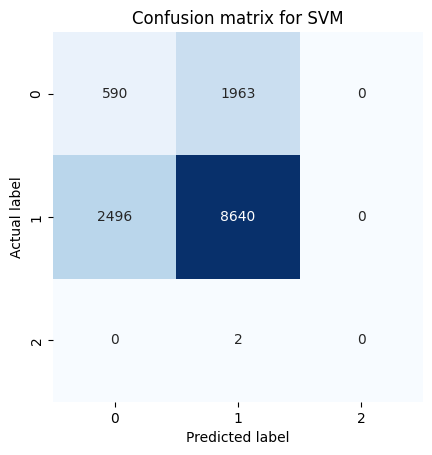

In [68]:
from sklearn import metrics
from array import array

metrics.confusion_matrix(y_test, y_pred)
#array([[1690, 344],[1084, 8019]], dtype='int64')
matrix_confusion = confusion_matrix(y_test, y_pred)
matrix_confusion
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues',
fmt='d', cbar=False)
plt.title('Confusion matrix for SVM', y=1.0)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy : 87.44 %


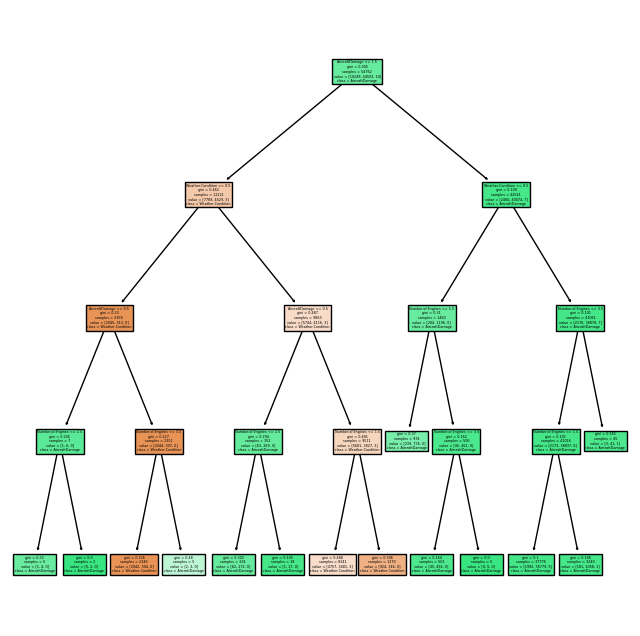

In [69]:
#Decision Tree CLassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
y = new_aviation_df["InjurySeverity"]
X = new_aviation_df[["Weather.Condition", "AircraftDamage", "Number.of.Engines"]]
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)
# Decision Tree using Train Data
model_DTC = DecisionTreeClassifier(max_depth = 4)
model_DTC.fit(X_train, y_train)
# Predict Response corresponding to Predictors
y_train_pred = model_DTC.predict(X_train)
y_test_pred = model_DTC.predict(X_test)
f=plt.figure(figsize=(8,8))
plot_tree(model_DTC,filled= True,
feature_names= X_train.columns,
class_names=["Weather.Condition", "AircraftDamage","Number.of.Engines"])
accuracies['Decision Tree']= accuracy_score(y_test, y_pred)
print("Accuracy :", round(model_DTC.score(X_test, y_test)*100,2),"%")

In [70]:
metrics.confusion_matrix(y_test, y_test_pred)
#array([[1767, 338],[1015, 8017]], dtype=int64)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69      2579
           1       0.94      0.90      0.92     11111
           3       0.00      0.00      0.00         1

    accuracy                           0.87     13691
   macro avg       0.53      0.55      0.54     13691
weighted avg       0.88      0.87      0.88     13691



Text(0.5, 23.52222222222222, 'Predicted label')

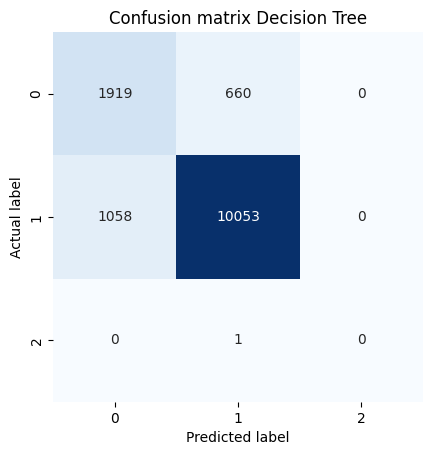

In [71]:
matrix_confusion = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues',
fmt='d', cbar=False)
plt.title('Confusion matrix Decision Tree', y=1.0)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [72]:
#ADA Boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
y = new_aviation_df["InjurySeverity"]
X = new_aviation_df[["Weather.Condition", "AircraftDamage", "Number.of.Engines"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2)
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model_abc = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model_abc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
Accuracy: 0.8763580856604113
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)
#array([[1730, 367],[1010, 8030]], dtype=int64)
print(classification_report(y_test,y_pred))
accuracies['ADA Boost']= accuracy_score(y_test, y_pred)

Accuracy: 0.8580819516470675
              precision    recall  f1-score   support

           0       0.62      0.61      0.61      2541
           1       0.91      0.92      0.91     11146
           3       0.00      0.00      0.00         4

    accuracy                           0.86     13691
   macro avg       0.51      0.51      0.51     13691
weighted avg       0.86      0.86      0.86     13691



Text(0.5, 23.52222222222222, 'Predicted label')

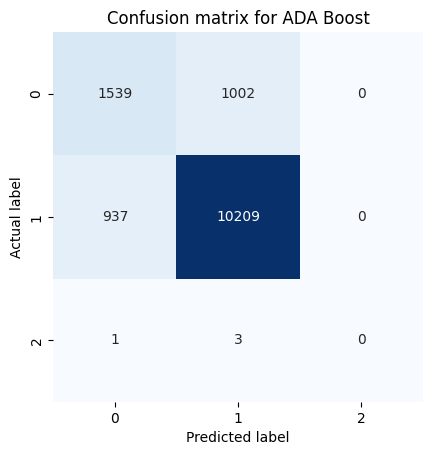

In [73]:
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues',
fmt='d', cbar=False)
plt.title('Confusion matrix for ADA Boost', y=1.0)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

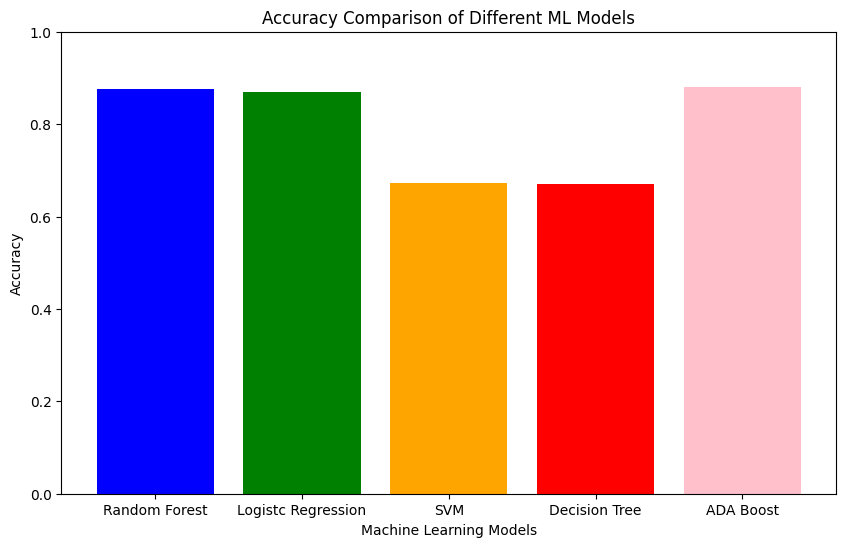

In [ ]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange','red','pink'])
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for accuracy
plt.title('Accuracy Comparison of Different ML Models')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a voting ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('random_forest', model_rfc),
    ('linear_regression', model_lr),
    ('svm', model_svm),
    ('decision_tree', model_DTC),
    ('ada_boost', model_abc)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test)
ensemble_predictions

array([1, 1, 1, ..., 0, 0, 1])

Accuracy of the Ensemble Model: 87.73%


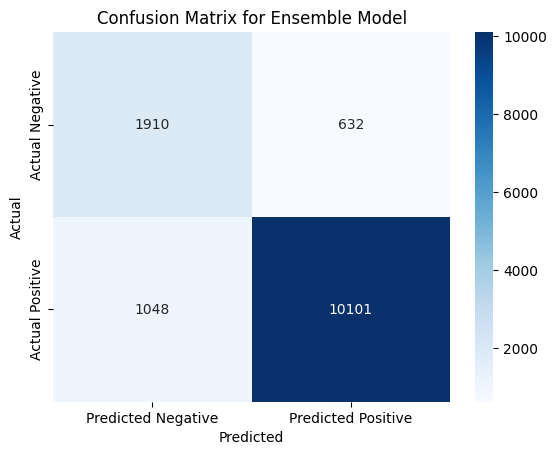

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, ensemble_predictions)

print("Accuracy of the Ensemble Model: {:.2f}%".format(accuracy * 100))

# Generate a confusion matrix
cm = confusion_matrix(y_test, ensemble_predictions)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

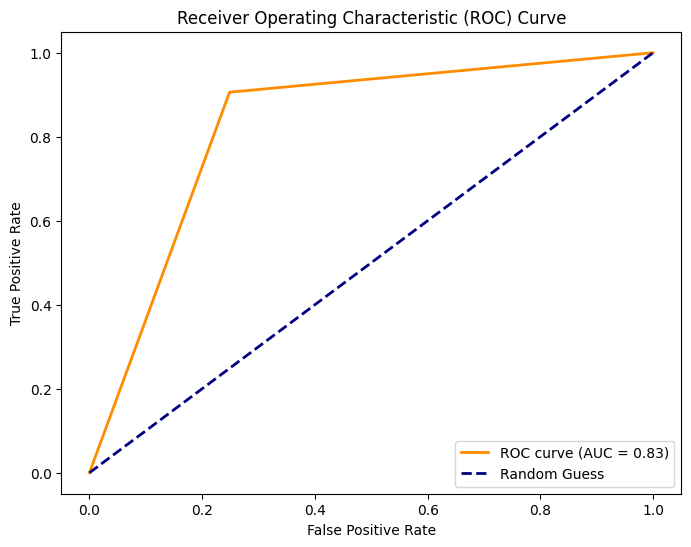

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, ensemble_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
